# Data Exploration Exercises
***

#### Spam Data

- Load the spam data set.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [3]:
#Load data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [6]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

### bigram: combinations of 2 words
 - Represent text as combinations of 2 words

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

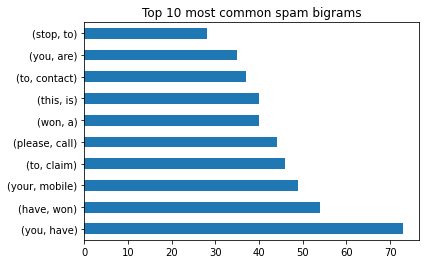

In [8]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common ham bigrams')

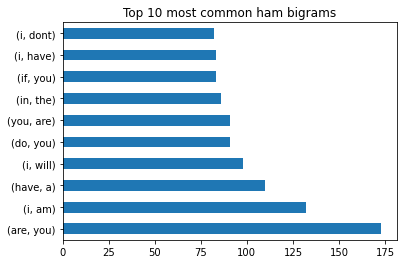

In [10]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

#### Word Cloud

(-0.5, 799.5, 599.5, -0.5)

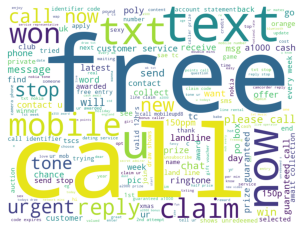

In [12]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

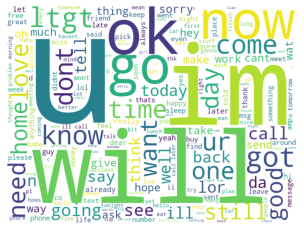

In [13]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

- Is there any overlap in the bigrams for the spam data and the ham data?
     - yes: you are

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Text(0.5, 1.0, 'Top 10 most common spam trigrams')

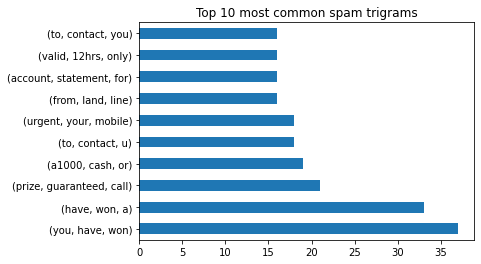

In [16]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')

Text(0.5, 1.0, 'Top 10 most common ham trigrams')

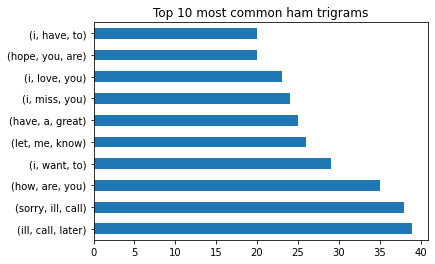

In [17]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')

#### 2.) Explore the blog articles using the techniques discussed in the exploration lesson.

In [ ]:
#Let's check out the Sentiment in the spam and ham

import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('He is really good')